In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
from google.colab import drive 
drive.mount('/content/drive') 

Mounted at /content/drive


# 1. 資料準備

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_img_train,y_label_train),\
(x_img_test,y_label_test)=cifar10.load_data() 

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
y_label_train=y_label_train.reshape(-1)
y_label_test=y_label_test.reshape(-1)

In [ ]:
print("train data:",'images:',x_img_train.shape,"labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ," labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3) labels: (50000,)
test  data: images: (10000, 32, 32, 3)  labels: (10000,)


In [ ]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [ ]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_label_train)
y_test_onehot = utils.to_categorical(y_label_test)

In [ ]:
print("train data:",'images:',x_img_train_normalize.shape,
   " labels:",y_train_onehot.shape) 
print("test  data:",'images:',x_img_test_normalize.shape ,
   " labels:",y_test_onehot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)


# 建立模型

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import add,GlobalAveragePooling2D
from tensorflow.keras import Input,Model
import tensorflow.keras.layers

In [ ]:
inputs = Input(shape=(32, 32, 3), name='input_layer')
x = Conv2D(
    filters=32,kernel_size=(3,3),input_shape=(32, 32,3), 
    activation='relu',padding='same')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(
    filters=64, kernel_size=(3, 3), 
    activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

In [ ]:
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

In [ ]:
model =Model(inputs, outputs, name='CifarCNNFunc')

In [ ]:
print(model.summary())

Model: "CifarCNNFunc"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)             

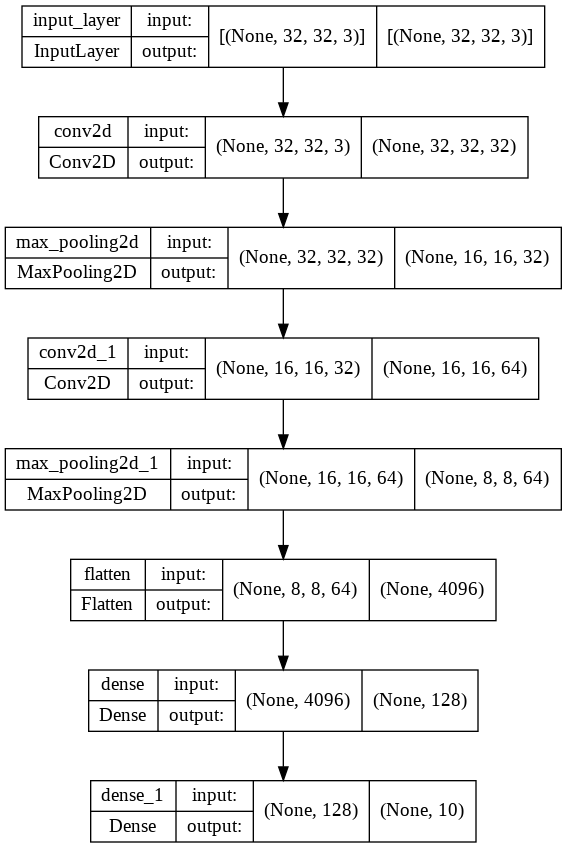

In [ ]:
tensorflow.keras.utils.plot_model(model, 'CifarCNNFunc.png', show_shapes=True)

# 訓練模型

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])

In [ ]:
train_history=model.fit(
    x_img_train_normalize, y_train_onehot,validation_split=0.2,
    epochs=10, batch_size=200, verbose=1)          

Epoch 1/10
200/200 [==============================] - 12s 11ms/step - loss: 1.6129 - acc: 0.4249 - val_loss: 1.3472 - val_acc: 0.5167
Epoch 2/10
200/200 [==============================] - 2s 9ms/step - loss: 1.2408 - acc: 0.5620 - val_loss: 1.1801 - val_acc: 0.5917
Epoch 3/10
200/200 [==============================] - 2s 9ms/step - loss: 1.0883 - acc: 0.6195 - val_loss: 1.0876 - val_acc: 0.6219
Epoch 4/10
200/200 [==============================] - 2s 9ms/step - loss: 0.9961 - acc: 0.6546 - val_loss: 1.0269 - val_acc: 0.6482
Epoch 5/10
200/200 [==============================] - 2s 8ms/step - loss: 0.9310 - acc: 0.6773 - val_loss: 0.9854 - val_acc: 0.6612
Epoch 6/10
200/200 [==============================] - 2s 9ms/step - loss: 0.8698 - acc: 0.6992 - val_loss: 0.9591 - val_acc: 0.6685
Epoch 7/10
200/200 [==============================] - 2s 9ms/step - loss: 0.8230 - acc: 0.7161 - val_loss: 0.9231 - val_acc: 0.6858
Epoch 8/10
200/200 [==============================] - 2s 8ms/step - loss: 

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

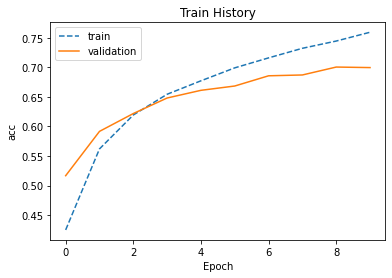

In [ ]:
show_train_history(train_history,'acc','val_acc')

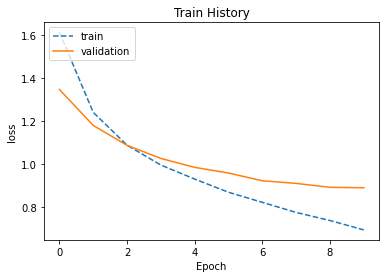

In [ ]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_img_test_normalize,y_test_onehot)

313/313 [==============================] - 1s 4ms/step - loss: 0.8930 - acc: 0.7018


In [ ]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 0.8929571509361267 test_acc= 0.7017999887466431


# 進行預測

In [ ]:
probability=model.predict(x_img_test_normalize)

In [ ]:
prediction=tf.argmax(probability, axis=-1).numpy()

In [ ]:
prediction[:10]

array([3, 8, 0, 0, 6, 6, 1, 6, 3, 1])

# 查看預測結果

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
      5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

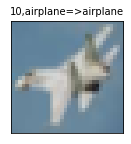

In [ ]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,idx=10,num=1)

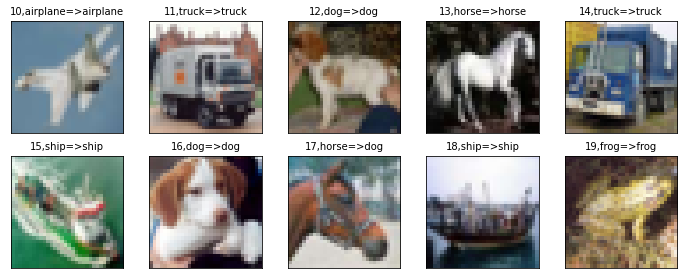

In [ ]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,idx=10,num=10)

# 查看預測機率

In [ ]:
def show_predicted_probability(
    images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary')
  plt.show()
  print('label:',label_dict[labels[idx]],
        'predict:',label_dict[prediction[idx]]) 
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))      

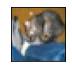

label: cat predict: cat
airplane   Probability:0.010793699
automobile Probability:0.000214269
bird       Probability:0.001248178
cat        Probability:0.783006370
deer       Probability:0.001462042
dog        Probability:0.105131559
frog       Probability:0.001456885
horse      Probability:0.001685892
ship       Probability:0.092017055
truck      Probability:0.002984084


In [ ]:
show_predicted_probability(x_img_test,y_label_test,prediction,probability,0) 

# confusion matrix

In [ ]:
import pandas as pd

In [ ]:
pd.crosstab(y_label_test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,763,29,27,25,12,8,8,15,70,43
1,14,854,3,12,0,6,5,6,25,75
2,77,14,476,96,88,89,72,57,20,11
3,22,15,33,563,52,187,52,40,21,15
4,23,8,46,87,607,57,49,105,17,1
5,20,3,25,168,27,666,15,55,12,9
6,9,11,26,98,34,35,758,11,11,7
7,19,6,15,53,39,68,5,779,5,11
8,57,51,3,15,6,9,5,5,822,27


In [ ]:
df = pd.DataFrame({'label':y_label_test, 'predict':prediction})

In [ ]:
df[:5]

,label,predict
0,3,3
1,8,8
2,8,0
3,0,0
4,6,6


In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
128,5,3
158,5,3
178,5,3
232,5,3
321,5,3
...,...,...
9657,5,3
9761,5,3
9823,5,3
9928,5,3


# 查看預測錯誤資料

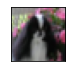

label: dog predict: horse
airplane   Probability:0.000511519
automobile Probability:0.001856293
bird       Probability:0.002915875
cat        Probability:0.157462940
deer       Probability:0.000427562
dog        Probability:0.196846992
frog       Probability:0.000016876
horse      Probability:0.501007140
ship       Probability:0.000142309
truck      Probability:0.138812408


In [ ]:
show_predicted_probability(x_img_test,y_label_test,prediction,probability,42)

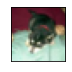

label: dog predict: cat
airplane   Probability:0.012226864
automobile Probability:0.047274444
bird       Probability:0.014828214
cat        Probability:0.459681094
deer       Probability:0.003961257
dog        Probability:0.241371468
frog       Probability:0.220082760
horse      Probability:0.000534908
ship       Probability:0.000007166
truck      Probability:0.000031800


In [ ]:
show_predicted_probability(x_img_test,y_label_test,prediction,probability,128)

#建立儲存模型路徑

In [ ]:
import os
def Save_model_to_gdrive(model_dir,model_name): 
  path= model_dir+model_name
  os.makedirs(path,exist_ok=True) 
  try:
    model_json = model.to_json()  
    with open(path+"structure.json","w") as json_file:
      json_file.write(model_json)
    model.save(path+"whole.h5",save_format='h5')    
  except: 
    print('No structure')
  model.save(path+"SavedModel",save_format='tf')  
  model.save_weights(path+"weight.h5")    
  os.system("cp -r Model drive/MyDrive")  

In [ ]:
Save_model_to_gdrive(model_dir='Model/',model_name='CifarCNNFunc/')

INFO:tensorflow:Assets written to: Model/CifarCNNFunc/SavedModel/assets


查看雲端硬碟

In [ ]:
ls -l drive/MyDrive/Model

total 16038
-rw------- 1 root root 16410384 Mar 12 05:57 Cifar_C5P1_ErAuBn.h5
drwx------ 2 root root     4096 Jun 29  2021 CifarCNN/
drwx------ 3 root root     4096 May 30 02:09 CifarCNNFunc/
drwx------ 2 root root     4096 Mar 20 08:54 CifarCNNSub/


In [ ]:
ls -l drive/MyDrive/Model/CifarCNNFunc

total 8593
drwx------ 4 root root    4096 May 30 02:09 SavedModel/
-rw------- 1 root root    3415 May 30 02:09 structure.json
-rw------- 1 root root 2202904 May 30 02:09 weight.h5
-rw------- 1 root root 6588096 May 30 02:09 whole.h5
